# General Social Survey (GSS) Analysis: What factors drive happiness?

&nbsp;
&nbsp;

**GSS Survey Overview:**

The GSS aims to gather data on contemporary American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes; to examine the structure and functioning of society in general as well as the role played by relevant subgroups; to compare the United States to other societies in order to place American society in comparative perspective and develop cross-national models of human society; and to make high-quality data easily accessible to scholars, students, policy makers, and others, with minimal cost and waiting.[2]

The data collected about this survey includes both demographic information and respondents' opinions on matters ranging from government spending to the state of race relations to the existence and nature of God. Because of the wide range of topics covered, and the comprehensive gathering of demographic information, survey results allow social scientists to correlate demographic factors like age, race, gender, and urban/rural upbringing with beliefs, and thereby determine whether, for example, an average middle-aged black male respondent would be more or less likely to move to a different U.S. state for economic reasons than a similarly situated white female respondent; or whether a highly educated person with a rural upbringing is more likely to believe in a transcendent God than a person with an urban upbringing and only a high-school education.

*Reference:* https://en.wikipedia.org/wiki/General_Social_Survey

&nbsp;

**GSS Data Overview:**

The General Social Surveys (GSS) have been conducted by the National Opinion Research Center (NORC) annually since 1972, except for the years 1979, 1981, and 1992 (a supplement was added in 1992), and biennially beginning in 1994. 

*Reference:* http://www.thearda.com/Archive/Files/Descriptions/GSS2014.asp

&nbsp;

**Variables Overview:**

&nbsp;

**Datasets Used:**

1. General Social Survey, 1972-2016 for assessment of General Happiness over time
2. General Social Survey, 2006-2016 for assessment of General Happiness and it's relationship with other factors

&nbsp;

**Hypothesis:**

# Analysis

&nbsp;

**General Happiness:**

Every other year for four decades, roughly a third of Americans have said they’re “very happy,” 
and about half report being “pretty happy.” Only about 10 to 15 percent typically say they’re “not too happy.


Beneath these averages are some demographic differences. For many years, researchers found that women were happier than men, although recent studies contend that the gap has narrowed or may even have been reversed. Political junkies might be interested to learn that conservative women are particularly blissful: about 40 percent say they are very happy. That makes them slightly happier than conservative men and significantly happier than liberal women. The unhappiest of all are liberal men; only about a fifth consider themselves very happy.

http://www.nytimes.com/2013/12/15/opinion/sunday/a-formula-for-happiness.html?ref=opinion&_r=1&

In [36]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

In [37]:
#hide all warnings for specific libraries in notebook
warnings.filterwarnings("ignore")

In [38]:
#apply seaborn styleset for plotting and poster style for enhanced visualizations
sns.set_style("dark")
sns.set(color_codes=True)
sns.set_context("poster")

In [39]:
#read in data for happiness over time (1972 - 2016)
gss_happy_path_file = "../data/Happiness1972-2016.csv"
gss_happy_df = pd.read_csv(gss_happy_path_file, encoding="ISO-8859-1")
gss_happy_df.head()

,General happiness,Gss year for this respondent
0,Not too happy,1972
1,Not too happy,1972
2,Pretty happy,1972
3,Not too happy,1972
4,Pretty happy,1972


In [40]:
#read in data for subset of data (2006-2016), effectively last 10 years for snapshot analysis
gss_path_file = "../data/GSSData_2006to2016.csv"
gss_df = pd.read_csv(gss_path_file, encoding="ISO-8859-1")
gss_df.head()

,Ballot used for interview,Specific denomination,Rs religious preference,Should marijuana be made legal,Courts dealing with criminals,Importance of gun control issue to r,Caring for the poor -- version z,Halting rising crime rate,Think of self as liberal or conservative,Vote obama or mccain,...,Was r born in this country,"Region of residence, age 16",Type of place lived in when 16 yrs old,Race of respondent,Respondents sex,Type of college respondent attended,College major 1,Mothers highest degree,Rs highest degree,Gss year for this respondent
0,Ballot c,Not applicable,None,Not legal,Not harsh enough,Not applicable,Not applicable,Too much,Extremely liberal,Not applicable,...,No,Foreign,City gt 250000,Black,Female,Not applicable,Not applicable,Junior college,High school,2006
1,Ballot b,Not applicable,Catholic,Not legal,Too harsh,Not applicable,Not applicable,Not applicable,Slightly liberal,Not applicable,...,No,Middle atlantic,City gt 250000,Other,Male,Not applicable,Not applicable,High school,High school,2006
2,Ballot b,Not applicable,Catholic,Not legal,About right,Not applicable,Not applicable,Too much,Conservative,Not applicable,...,No,Middle atlantic,City gt 250000,White,Female,Not applicable,Not applicable,Don't know,Lt high school,2006
3,Ballot a,No denomination,Protestant,Not applicable,About right,Not applicable,Not applicable,Not applicable,Slightly liberal,Not applicable,...,Yes,Middle atlantic,City gt 250000,Black,Female,Not applicable,Not applicable,Graduate,High school,2006
4,Ballot a,Not applicable,Catholic,Not applicable,Too harsh,Not applicable,Not applicable,Not applicable,Liberal,Not applicable,...,Yes,Middle atlantic,City gt 250000,Black,Male,Not applicable,Not applicable,Graduate,High school,2006


# General Happiness over Time, Data Preparation

In [41]:
#Rename the year respondont in both dataframes for ease of using variable
gss_happy_df_renamed = gss_happy_df.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})
gss_df_renamed = gss_df.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})
gss_happy_df_renamed.head()

,General happiness,Year
0,Not too happy,1972
1,Not too happy,1972
2,Pretty happy,1972
3,Not too happy,1972
4,Pretty happy,1972


In [42]:
# Summarize Happiness data over the years ( 1972 - 2016)

#group by variables 
happiness_summary =gss_happy_df_renamed.groupby(['General happiness',
                                                 'Year'], as_index=False).size().unstack(fill_value=0).reset_index()

#drop row that is not relevant
happiness_summary = happiness_summary.drop('Data collection: General Social Survey\rCase Selection: all cases', 1)

#drop via index matching to have only remaining values with survey responses (i.e. removed not applicable)
happiness_summary = happiness_summary.drop(happiness_summary.index[[0,1,2,5]])

total = happiness_summary.apply(np.sum)
total['General happiness'] = 'total'
happiness_summary = happiness_summary.append(pd.DataFrame(total.values, index=total.keys()).T, ignore_index=True)
happiness_summary.set_index('General happiness', inplace=True)

#iteratie through each record to obtain percentage of total
for idx in happiness_summary.index:
    happiness_summary.loc[idx] = ((happiness_summary.loc[idx]/happiness_summary.loc['total']))*100
    
happiness_summary = happiness_summary.round(2)

happiness_summary.head()

Year,1972,1973,1974,1975,1976,1977,1978,1980,1982,1983,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
General happiness,,,,,,,,,,,,,,,,,,,,,
Not too happy,16.5006,13.0667,13.1081,13.064,12.5417,11.9188,9.55834,13.3379,14.5013,12.7781,...,12.1169,10.551,12.4178,13.463,13.061,15.6824,15.5468,14.1039,13.4783,15.8097
Pretty happy,53.2379,51.0667,48.9865,54.0741,53.3689,53.2417,56.0976,52.736,54.9326,56.0712,...,56.1297,57.7242,57.2681,55.1982,56.1286,54.5906,58.0677,55.7026,55.4545,55.9986
Very happy,30.2615,35.8667,37.9054,32.862,34.0894,34.8396,34.3441,33.9261,30.566,31.1507,...,31.7534,31.7249,30.3141,31.3388,30.8104,29.727,26.3855,30.1935,31.0672,28.1917
total,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [43]:
# #global plotting settings
# # plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 10
# plt.rcParams['axes.labelsize'] = 10
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titlesize'] = 10
# plt.rcParams['xtick.labelsize'] = 8
# plt.rcParams['ytick.labelsize'] = 8
# plt.rcParams['legend.fontsize'] = 10
# plt.rcParams['figure.titlesize'] = 12

# # Set an aspect ratio
# width, height = plt.figaspect(1.68)
# fig = plt.figure(figsize=(width,height), dpi=400)

# General Happiness over Time, Data Visualization

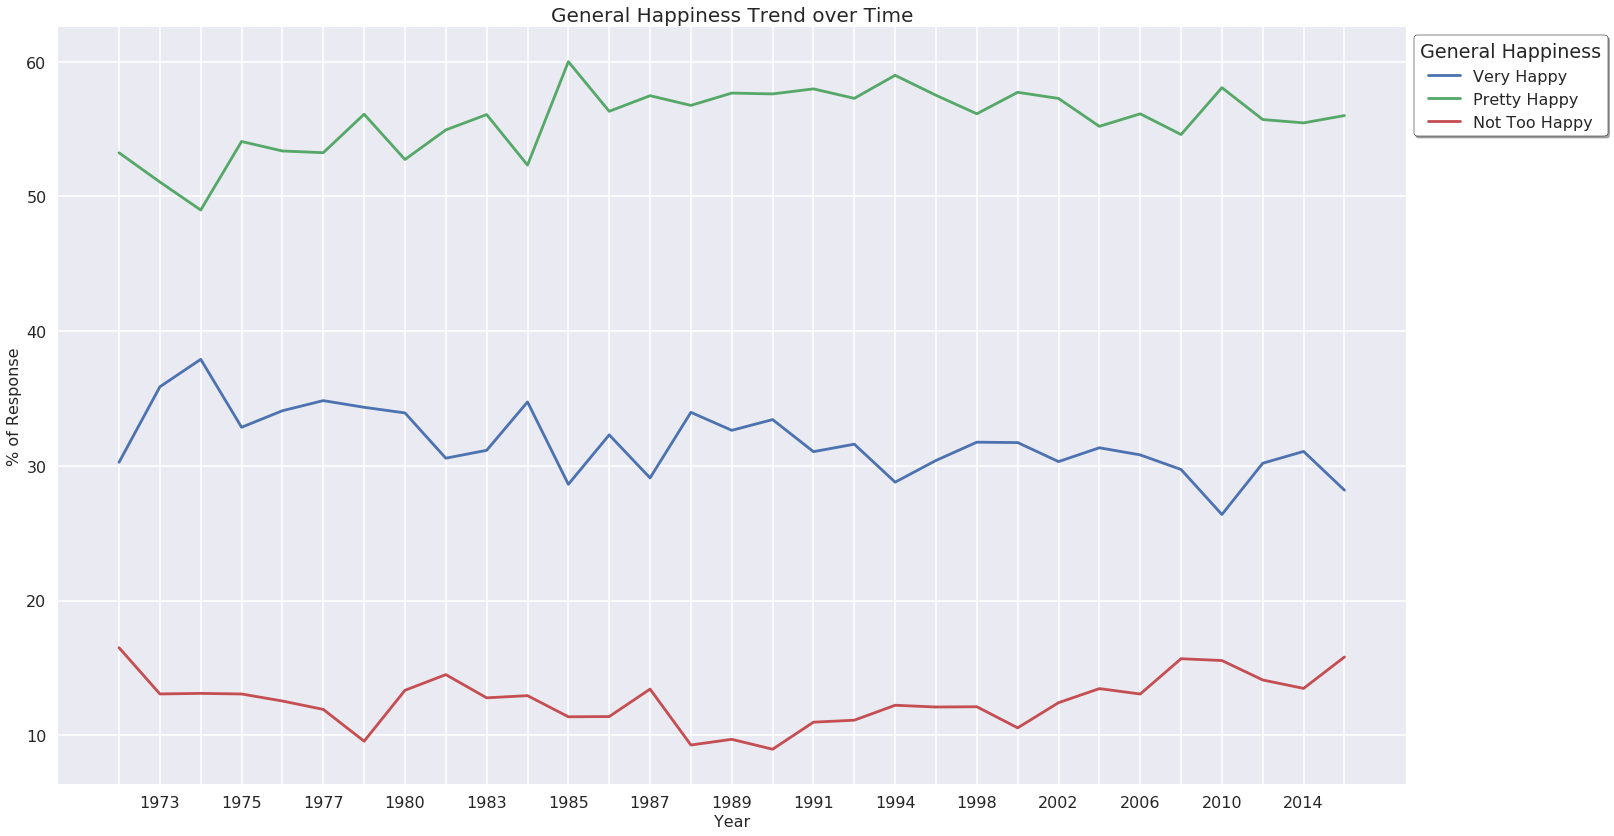

In [44]:
# Plot Data from 1972- 2016 (Happiness Measure )

#define axis lists
x_axis=list(happiness_summary)
y_axis=list(happiness_summary.loc['Very happy'])
y_axis1=list(happiness_summary.loc['Pretty happy'])
y_axis2=list(happiness_summary.loc['Not too happy'])

#figure size
plt.figure(figsize = (20,12))

#plot title
plt.title('General Happiness Trend over Time',
         fontdict = {'fontsize': 20})

# Remove the plot frame lines   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


#plot values
very_happy, = plt.plot(x_axis, y_axis, label="Very Happy")
pretty_happy, = plt.plot(x_axis, y_axis1, label="Pretty Happy")
not_too_happy, = plt.plot(x_axis, y_axis2, label="Not Too Happy")

#add legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "General Happiness", fancybox=True, shadow=True)

#add labels
plt.xlabel('Year',
          fontdict = {'fontsize': 16})
plt.ylabel('% of Response',
          fontdict = {'fontsize': 16})


#truncate the axis
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")   
    

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Summary.png")

#show chart
plt.show()

# General Happiness vs. Condition of health, Data Preparation

In [45]:
#creating a new dataframe with selected columns
gss_happiness_health = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Condition of health"]]
gss_happiness_health_renamed = gss_happiness_health.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})

gss_happiness_health_renamed.head()

,Year,General happiness,Condition of health
0,2006,Pretty happy,Fair
1,2006,Very happy,Not applicable
2,2006,Pretty happy,Not applicable
3,2006,Very happy,Excellent
4,2006,Pretty happy,Good


In [46]:
#group by variables
gss_happiness_grouped = gss_happiness_health_renamed.groupby(["Year", 
                                                              "General happiness",
                                                              "Condition of health"],
                                                             as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_grouped = gss_happiness_grouped[~gss_happiness_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

#drop the columns for condition of health, axis=1 implies that it is a column
gss_happiness_grouped = gss_happiness_grouped.drop('No answer', 1)
gss_happiness_grouped = gss_happiness_grouped.drop('Not applicable', 1)
gss_happiness_grouped = gss_happiness_grouped.drop("Don't know", 1)

#dataframe for "Pretty Happy vs Condition of Health"
gss_happiness_grouped_prettyhappy = gss_happiness_grouped.loc[gss_happiness_grouped['General happiness'] == 'Pretty happy']
gss_happiness_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_grouped_prettyhappy['total'] = gss_happiness_grouped_prettyhappy['Excellent'] + gss_happiness_grouped_prettyhappy['Fair'] + gss_happiness_grouped_prettyhappy['Poor'] + gss_happiness_grouped_prettyhappy['Good']
gss_happiness_grouped_prettyhappy
    
#dataframe for "Very happy vs Condition of Health"
gss_happiness_grouped_veryhappy = gss_happiness_grouped .loc[gss_happiness_grouped ['General happiness'] == 'Very happy']
gss_happiness_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_grouped_veryhappy['total']= gss_happiness_grouped_veryhappy['Excellent'] + gss_happiness_grouped_veryhappy['Fair'] + gss_happiness_grouped_veryhappy['Poor'] + gss_happiness_grouped_veryhappy['Good']
gss_happiness_grouped_veryhappy

#dataframe for "Not too Happy vs Condition of Health"
gss_happiness_grouped_nothappy = gss_happiness_grouped .loc[gss_happiness_grouped ['General happiness'] == 'Not too happy']
gss_happiness_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_grouped_nothappy['total']= gss_happiness_grouped_nothappy['Excellent'] + gss_happiness_grouped_nothappy['Fair'] + gss_happiness_grouped_nothappy['Poor'] + gss_happiness_grouped_nothappy['Good']
gss_happiness_grouped_nothappy

Condition of health,General happiness,Excellent,Fair,Good,Poor,total
Year,,,,,,
2006,Not too happy,33,92,103,36,264
2008,Not too happy,29,77,86,32,224
2010,Not too happy,33,69,79,31,212
2012,Not too happy,23,63,62,31,179
2014,Not too happy,39,79,72,52,242
2016,Not too happy,32,111,112,58,313


# General Happiness vs. Condition of health, Data Visualization

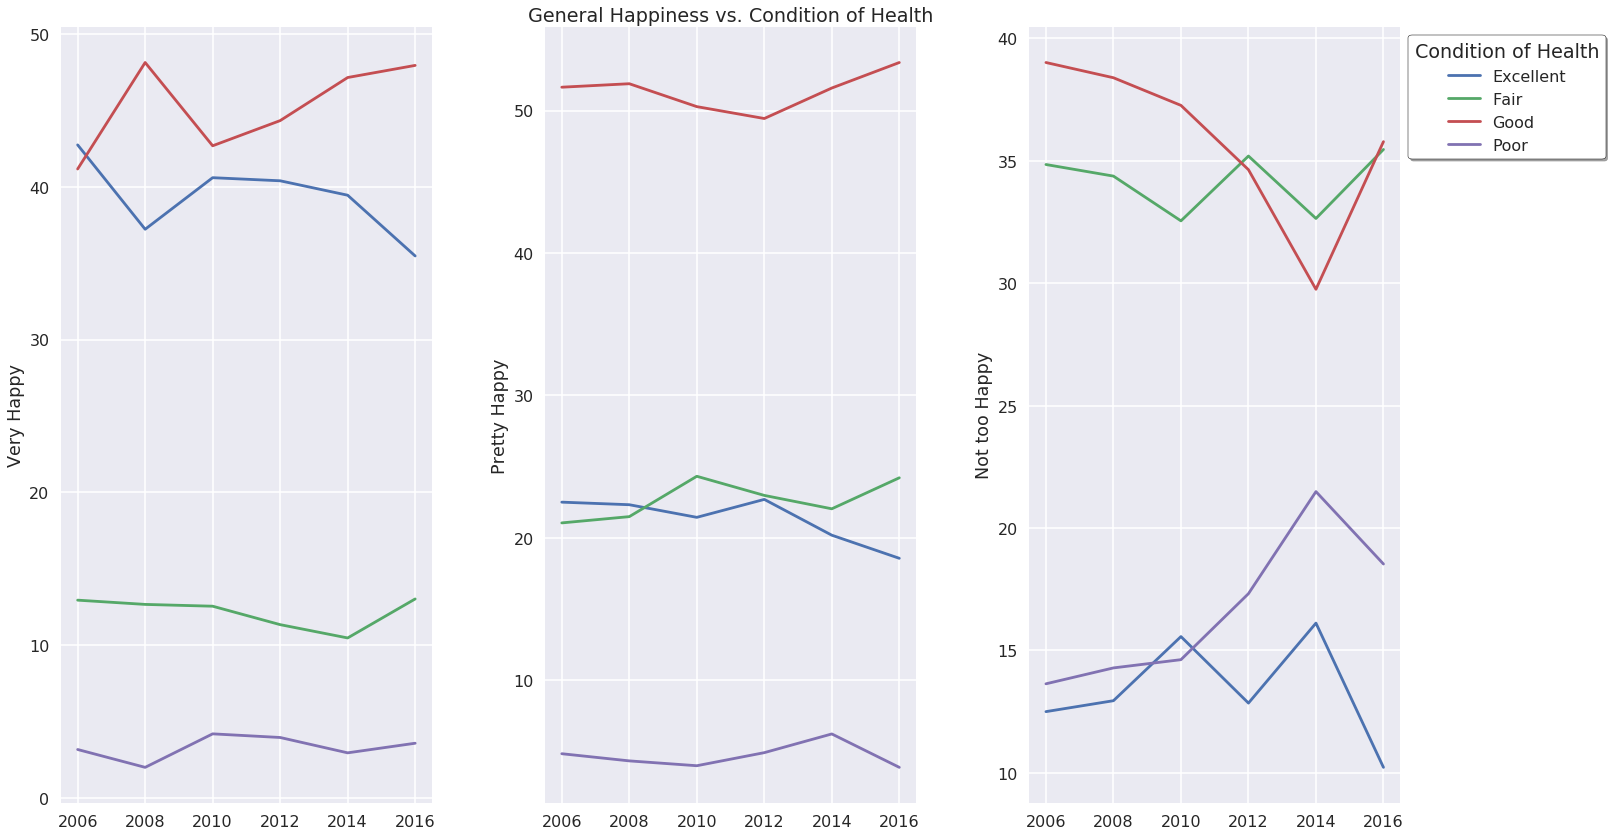

In [47]:
#very happy axis
y_axis_excellent1= (gss_happiness_grouped_veryhappy['Excellent']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_fair1= (gss_happiness_grouped_veryhappy['Fair']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_good1= (gss_happiness_grouped_veryhappy['Good']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_poor1= (gss_happiness_grouped_veryhappy['Poor']/gss_happiness_grouped_veryhappy['total'])*100

#pretty happy axis
x_axis1 = gss_happiness_grouped_prettyhappy.index.get_values()
y_axis_excellent = (gss_happiness_grouped_prettyhappy['Excellent']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_fair = (gss_happiness_grouped_prettyhappy['Fair']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_good = (gss_happiness_grouped_prettyhappy['Good']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_poor = (gss_happiness_grouped_prettyhappy['Poor']/gss_happiness_grouped_prettyhappy['total'])*100

#not happy axis
y_axis_excellent2= (gss_happiness_grouped_nothappy['Excellent']/gss_happiness_grouped_nothappy['total'])*100
y_axis_fair2= (gss_happiness_grouped_nothappy['Fair']/gss_happiness_grouped_nothappy['total'])*100
y_axis_good2= (gss_happiness_grouped_nothappy['Good']/gss_happiness_grouped_nothappy['total'])*100
y_axis_poor2= (gss_happiness_grouped_nothappy['Poor']/gss_happiness_grouped_nothappy['total'])*100


#figure size
plt.figure(figsize = (20,12))
#tight layout
plt.tight_layout()

#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis1, y_axis_excellent1, label="Excellent")
plt.plot(x_axis1, y_axis_fair1, label="Fair")
plt.plot(x_axis1, y_axis_good1, label="Good")
plt.plot(x_axis1, y_axis_poor1, label="Poor")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis1, y_axis_excellent, label="Excellent")
plt.plot(x_axis1, y_axis_fair, label="Fair")
plt.plot(x_axis1, y_axis_good, label="Good")
plt.plot(x_axis1, y_axis_poor, label="Poor")
plt.title("General Happiness vs. Condition of Health")
plt.ylabel('Pretty Happy')

#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis1, y_axis_excellent2, label="Excellent")
plt.plot(x_axis1, y_axis_fair2, label="Fair")
plt.plot(x_axis1, y_axis_good2, label="Good")
plt.plot(x_axis1, y_axis_poor2, label="Poor")
plt.ylabel('Not too Happy')

#add legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Condition of Health", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Health.png")

#show chart
plt.show()

# General Happiness vs. Social Issues (Marijuana), Data Preparation

In [48]:
#creating a new dataframe with selected columns
gss_happiness_social = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Should marijuana be made legal"]]

#rename the year value for ease of calling in code
gss_happiness_social_renamed = gss_happiness_social.rename(columns={"Gss year for this respondent                       ": 
                                                                    "Year", 
                                                                   })
#group the values based on variables
gss_happiness_social_grouped = gss_happiness_social_renamed.groupby(["Year", 
                                                                     "General happiness",
                                                                     "Should marijuana be made legal"],as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_social_grouped = gss_happiness_social_grouped[~gss_happiness_social_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

#drop the columns for condition of health, axis=1 implies that it is a column
gss_happiness_social_grouped = gss_happiness_social_grouped.drop("No answer", 1)
gss_happiness_social_grouped = gss_happiness_social_grouped.drop("Not applicable", 1)
gss_happiness_social_grouped = gss_happiness_social_grouped.drop("Don't know", 1)

#dataframe for "Pretty Happy vs Social"
gss_happiness_social_grouped_prettyhappy = gss_happiness_social_grouped.loc[gss_happiness_social_grouped['General happiness'] == 'Pretty happy']
gss_happiness_social_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_social_grouped_prettyhappy['total'] = gss_happiness_social_grouped_prettyhappy['Legal'] + gss_happiness_social_grouped_prettyhappy['Not legal']
gss_happiness_social_grouped_prettyhappy
    
#dataframe for "Very happy vs Social"
gss_happiness_social_grouped_veryhappy = gss_happiness_social_grouped .loc[gss_happiness_social_grouped ['General happiness'] == 'Very happy']
gss_happiness_social_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_social_grouped_veryhappy['total'] = gss_happiness_social_grouped_veryhappy['Legal'] + gss_happiness_social_grouped_veryhappy['Not legal']
gss_happiness_social_grouped_veryhappy

#dataframe for "Not too Happy vs Social"
gss_happiness_social_grouped_nothappy = gss_happiness_social_grouped .loc[gss_happiness_social_grouped ['General happiness'] == 'Not too happy']
gss_happiness_social_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_social_grouped_nothappy['total'] = gss_happiness_social_grouped_nothappy['Legal'] + gss_happiness_social_grouped_nothappy['Not legal']
gss_happiness_social_grouped_nothappy


Should marijuana be made legal,General happiness,Legal,Not legal,total
Year,,,,
2006,Not too happy,123,153,276
2008,Not too happy,87,126,213
2010,Not too happy,104,98,202
2012,Not too happy,109,91,200
2014,Not too happy,109,113,222
2016,Not too happy,215,103,318


# General Happiness vs. Social Issues (Marijuana), Data Visualization

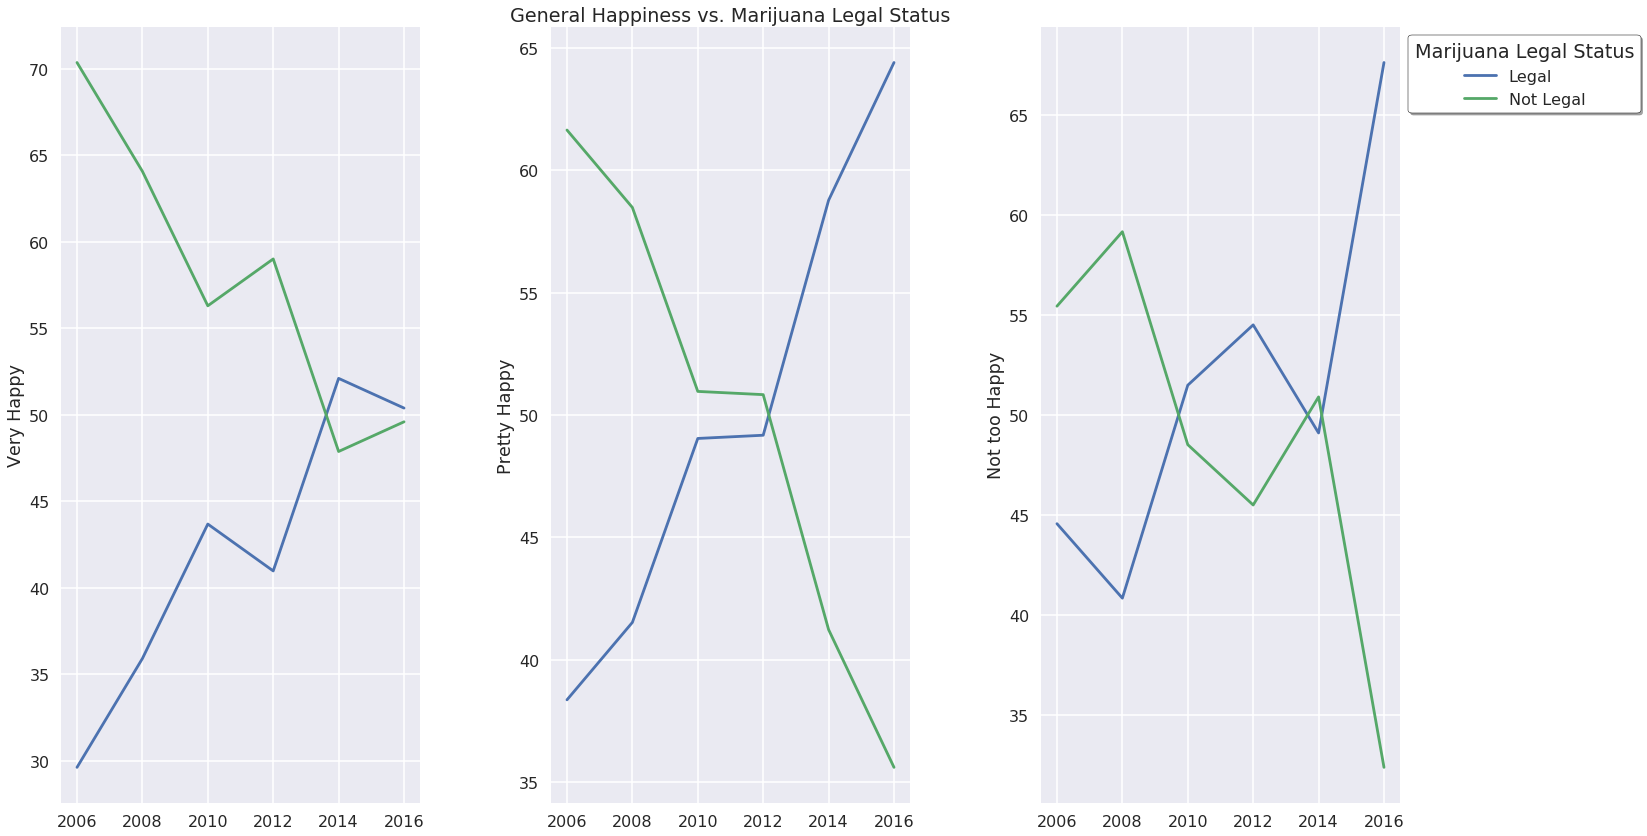

In [49]:
#very happy axis
x_axis_social = gss_happiness_social_grouped_veryhappy.index.get_values()
y_axis_legal1 = (gss_happiness_social_grouped_veryhappy['Legal']/gss_happiness_social_grouped_veryhappy['total'])*100
y_axis_not_legal1 = (gss_happiness_social_grouped_veryhappy['Not legal']/gss_happiness_social_grouped_veryhappy['total'])*100

#pretty happy axis
x_axis_social = gss_happiness_social_grouped_prettyhappy.index.get_values()
y_axis_legal = (gss_happiness_social_grouped_prettyhappy['Legal']/gss_happiness_social_grouped_prettyhappy['total'])*100
y_axis_not_legal = (gss_happiness_social_grouped_prettyhappy['Not legal']/gss_happiness_social_grouped_prettyhappy['total'])*100

#not too happy axis
y_axis_legal2 = (gss_happiness_social_grouped_nothappy['Legal']/gss_happiness_social_grouped_nothappy['total'])*100
y_axis_not_legal2 = (gss_happiness_social_grouped_nothappy['Not legal']/gss_happiness_social_grouped_nothappy['total'])*100


#figure size
plt.figure(figsize = (20,12))
#tight layout
# plt.tight_layout()

#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis_social, y_axis_legal1, label="Legal")
plt.plot(x_axis_social, y_axis_not_legal1, label="Not Legal")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis_social, y_axis_legal, label="Legal")
plt.plot(x_axis_social, y_axis_not_legal, label="Not Legal")
plt.ylabel('Pretty Happy')
plt.title('General Happiness vs. Marijuana Legal Status')


#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis_social, y_axis_legal2, label="Legal")
plt.plot(x_axis_social, y_axis_not_legal2,  label="Not Legal")
plt.ylabel('Not too Happy')

#legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Marijuana Legal Status", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Social.png")

#print charts
plt.show()

# General Happiness vs Gender - Data Preperation 

In [50]:
#creating a new dataframe with selected columns
gss_happiness_sex = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Respondents sex"]]

#rename the year value for ease of calling in code
gss_happiness_sex_renamed = gss_happiness_sex.rename(columns={"Gss year for this respondent                       ": 
                                                                    "Year", 
                                                                   })
#group the values based on variables
gss_happiness_sex_grouped = gss_happiness_sex_renamed.groupby(["Year", 
                                                                     "General happiness",
                                                                     "Respondents sex"],as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_sex_grouped = gss_happiness_sex_grouped[~gss_happiness_sex_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

# #drop the columns for condition of health, axis=1 implies that it is a column
# gss_happiness_social_grouped = gss_happiness_social_grouped.drop("No answer", 1)
# gss_happiness_social_grouped = gss_happiness_social_grouped.drop("Not applicable", 1)
# gss_happiness_social_grouped = gss_happiness_social_grouped.drop("Don't know", 1)

#dataframe for "Pretty Happy vs Sex"
gss_happiness_sex_grouped_prettyhappy = gss_happiness_sex_grouped.loc[gss_happiness_sex_grouped['General happiness'] == 'Pretty happy']
gss_happiness_sex_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_sex_grouped_prettyhappy['total'] = gss_happiness_sex_grouped_prettyhappy['Female'] + gss_happiness_sex_grouped_prettyhappy['Male']
gss_happiness_sex_grouped_prettyhappy
    
 #dataframe for "Very happy vs Social"
gss_happiness_sex_grouped_veryhappy = gss_happiness_sex_grouped .loc[gss_happiness_sex_grouped ['General happiness'] == 'Very happy']
gss_happiness_sex_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_sex_grouped_veryhappy['total'] = gss_happiness_sex_grouped_veryhappy['Female'] + gss_happiness_sex_grouped_veryhappy['Male']
gss_happiness_sex_grouped_veryhappy

#dataframe for "Not too Happy vs Social"
gss_happiness_sex_grouped_nothappy = gss_happiness_sex_grouped .loc[gss_happiness_sex_grouped ['General happiness'] == 'Not too happy']
gss_happiness_sex_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_sex_grouped_nothappy['total'] = gss_happiness_sex_grouped_nothappy['Female'] + gss_happiness_sex_grouped_nothappy['Male']
gss_happiness_sex_grouped_nothappy



Respondents sex,General happiness,Female,Male,total
Year,,,,
2006,Not too happy,227,163,390
2008,Not too happy,174,142,316
2010,Not too happy,166,151,317
2012,Not too happy,155,122,277
2014,Not too happy,171,170,341
2016,Not too happy,261,191,452


# General Happiness Vs Gender - Visualization 

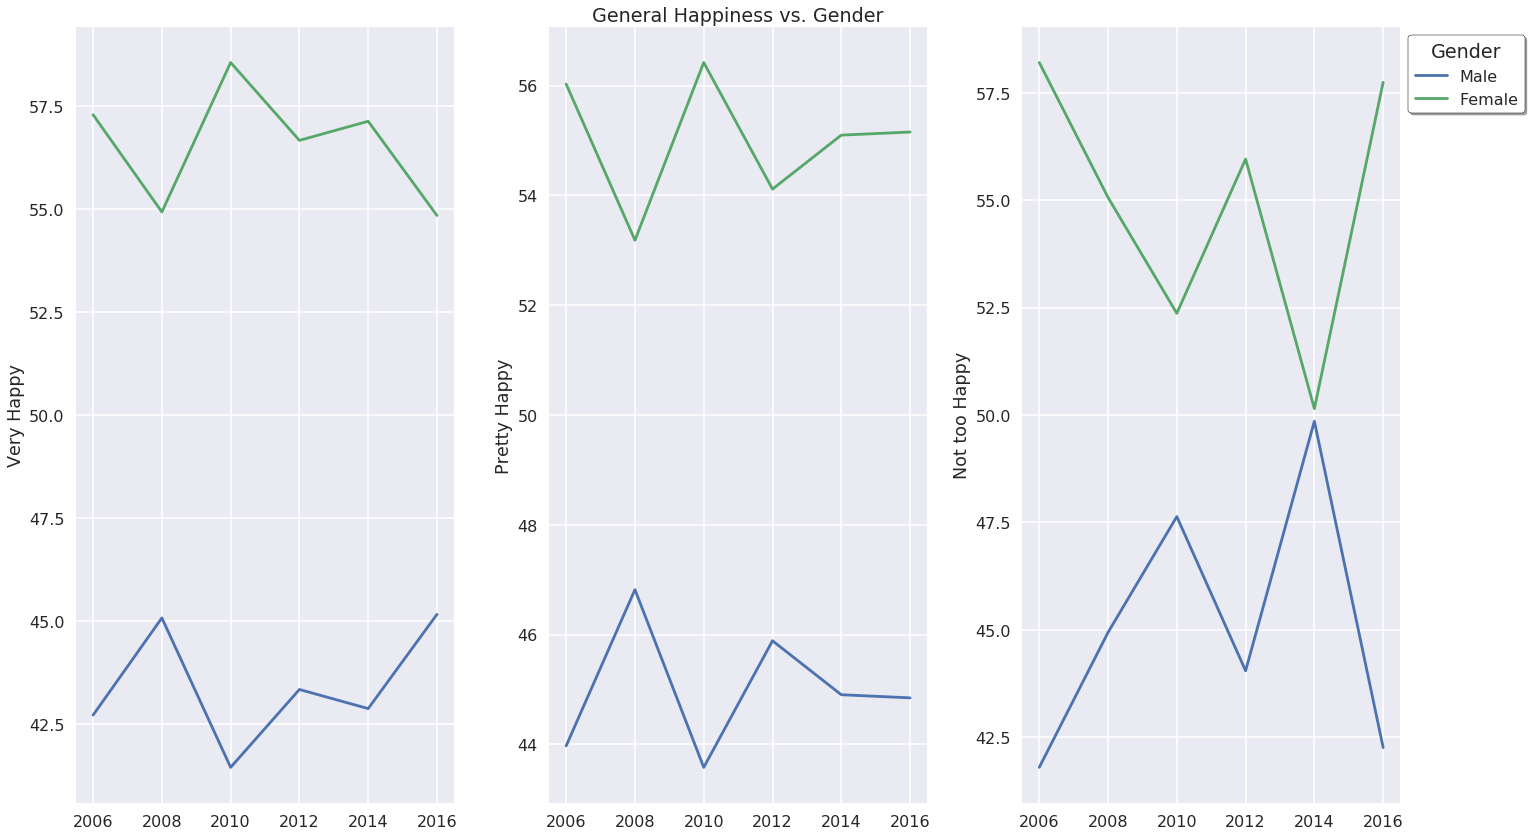

In [51]:
#very happy axis
x_axis_sex = gss_happiness_sex_grouped_veryhappy.index.get_values()
y_axis_male = (gss_happiness_sex_grouped_veryhappy['Male']/gss_happiness_sex_grouped_veryhappy['total'])*100
y_axis_female = (gss_happiness_sex_grouped_veryhappy['Female']/gss_happiness_sex_grouped_veryhappy['total'])*100

#pretty happy axis
x_axis_sex = gss_happiness_sex_grouped_prettyhappy.index.get_values()
y_axis_male1 = (gss_happiness_sex_grouped_prettyhappy['Male']/gss_happiness_sex_grouped_prettyhappy['total'])*100
y_axis_female1 = (gss_happiness_sex_grouped_prettyhappy['Female']/gss_happiness_sex_grouped_prettyhappy['total'])*100

#not too happy axis
y_axis_male2 = (gss_happiness_sex_grouped_nothappy['Male']/gss_happiness_sex_grouped_nothappy['total'])*100
y_axis_female2 = (gss_happiness_sex_grouped_nothappy['Female']/gss_happiness_sex_grouped_nothappy['total'])*100


#figure size
plt.figure(figsize = (20,12))
#tight layout
# plt.tight_layout()

#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis_sex, y_axis_male, label="Male")
plt.plot(x_axis_sex, y_axis_female, label="Female")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis_sex, y_axis_male1, label="Male")
plt.plot(x_axis_social, y_axis_female1, label="Female")
plt.ylabel('Pretty Happy')
plt.title('General Happiness vs. Gender')


#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis_sex, y_axis_male2, label="Male")
plt.plot(x_axis_sex, y_axis_female2,  label="Female")
plt.ylabel('Not too Happy')

#legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Gender", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Gender.png")

#print charts
plt.show()

# General Happiness vs Social View ( Conservative or Liberal) - Data Preperation 

In [52]:
#creating a new dataframe with selected columns
gss_happiness_view = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Think of self as liberal or conservative"]]

#rename the year value for ease of calling in code
gss_happiness_view_renamed = gss_happiness_view.rename(columns={"Gss year for this respondent                       ": 
                                                                    "Year", 
                                                                   })
#group the values based on variables
gss_happiness_view_grouped = gss_happiness_view_renamed.groupby(["Year", 
                                                                     "General happiness",
                                                                     "Think of self as liberal or conservative"],as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_view_grouped = gss_happiness_view_grouped[~gss_happiness_view_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

# #drop the columns for condition of health, axis=1 implies that it is a column
gss_happiness_view_grouped = gss_happiness_view_grouped.drop("No answer", 1)
#gss_happiness_view_grouped = gss_happiness_view_grouped.drop("Not applicable", 1)
gss_happiness_view_grouped = gss_happiness_view_grouped.drop("Don't know", 1)

gss_happiness_view_grouped['conservative_new']= gss_happiness_view_grouped['Conservative']+ gss_happiness_view_grouped['Extrmly conservative']+ gss_happiness_view_grouped['Slghtly conservative']

gss_happiness_view_grouped['liberal_new']= gss_happiness_view_grouped['Extremely liberal']+ gss_happiness_view_grouped['Liberal']+ gss_happiness_view_grouped['Slightly liberal']



gss_happiness_view_grouped = gss_happiness_view_grouped.drop("Conservative", 1)
gss_happiness_view_grouped = gss_happiness_view_grouped.drop("Extremely liberal", 1)
gss_happiness_view_grouped = gss_happiness_view_grouped.drop("Extrmly conservative", 1)
gss_happiness_view_grouped = gss_happiness_view_grouped.drop("Liberal", 1)
gss_happiness_view_grouped = gss_happiness_view_grouped.drop("Slghtly conservative", 1)
gss_happiness_view_grouped = gss_happiness_view_grouped.drop("Slightly liberal", 1)

gss_happiness_view_grouped


#dataframe for "Pretty Happy vs Social Views"
gss_happiness_view_grouped_prettyhappy = gss_happiness_view_grouped.loc[gss_happiness_view_grouped['General happiness'] == 'Pretty happy']
gss_happiness_view_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_view_grouped_prettyhappy['total'] = gss_happiness_view_grouped_prettyhappy['Moderate'] + gss_happiness_view_grouped_prettyhappy['conservative_new']+gss_happiness_view_grouped_prettyhappy['liberal_new']
gss_happiness_view_grouped_prettyhappy
    
 #dataframe for "Very happy vs Social Views"
gss_happiness_view_grouped_veryhappy = gss_happiness_view_grouped .loc[gss_happiness_view_grouped ['General happiness'] == 'Very happy']
gss_happiness_view_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_view_grouped_veryhappy['total'] = gss_happiness_view_grouped_veryhappy['Moderate'] + gss_happiness_view_grouped_veryhappy['conservative_new']+gss_happiness_view_grouped_veryhappy['liberal_new']
gss_happiness_view_grouped_veryhappy

# #dataframe for "Not too Happy vs Social View"
gss_happiness_view_grouped_nothappy = gss_happiness_view_grouped .loc[gss_happiness_view_grouped ['General happiness'] == 'Not too happy']
gss_happiness_view_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_view_grouped_nothappy['total'] = gss_happiness_view_grouped_nothappy['Moderate'] + gss_happiness_view_grouped_nothappy['conservative_new']+gss_happiness_view_grouped_nothappy['liberal_new']
gss_happiness_view_grouped_nothappy



Think of self as liberal or conservative,General happiness,Moderate,conservative_new,liberal_new,total
Year,,,,,
2006,Not too happy,131,112,124,367
2008,Not too happy,118,75,98,291
2010,Not too happy,112,100,86,298
2012,Not too happy,94,85,80,259
2014,Not too happy,143,100,80,323
2016,Not too happy,162,151,112,425


# General Happiness Vs Social View - Data Visualization 

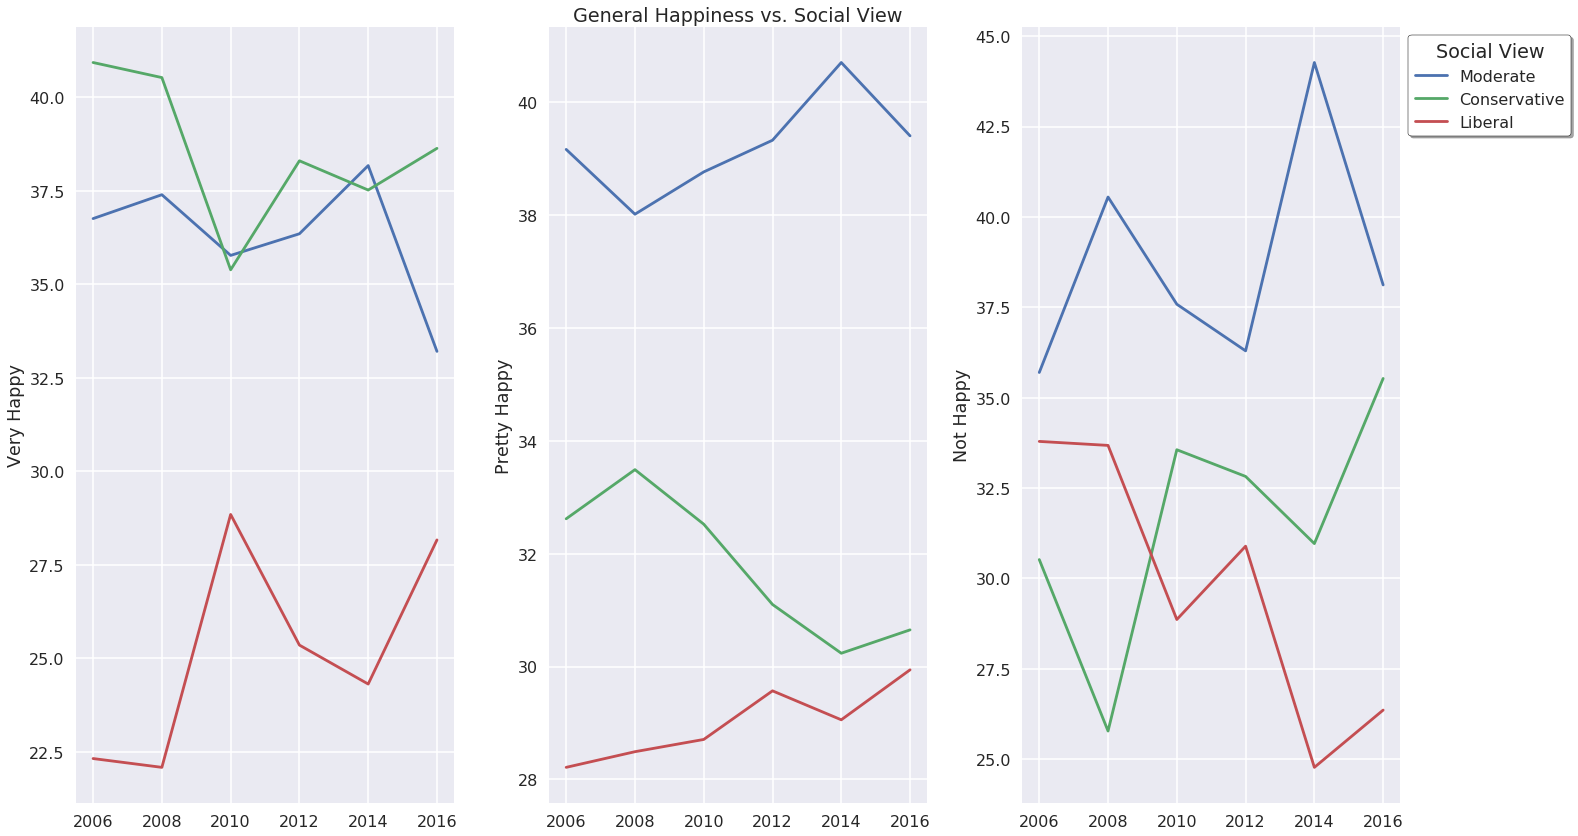

In [53]:
#very happy axis
x_axis_view = gss_happiness_view_grouped_veryhappy.index.get_values()
y_axis_mod = (gss_happiness_view_grouped_veryhappy['Moderate']/gss_happiness_view_grouped_veryhappy['total'])*100
y_axis_con = (gss_happiness_view_grouped_veryhappy['conservative_new']/gss_happiness_view_grouped_veryhappy['total'])*100
y_axis_lib = (gss_happiness_view_grouped_veryhappy['liberal_new']/gss_happiness_view_grouped_veryhappy['total'])*100

#pretty happy axis
x_axis_view = gss_happiness_view_grouped_prettyhappy.index.get_values()
y_axis_mod1 = (gss_happiness_view_grouped_prettyhappy['Moderate']/gss_happiness_view_grouped_prettyhappy['total'])*100
y_axis_con1 = (gss_happiness_view_grouped_prettyhappy['conservative_new']/gss_happiness_view_grouped_prettyhappy['total'])*100
y_axis_lib1 = (gss_happiness_view_grouped_prettyhappy['liberal_new']/gss_happiness_view_grouped_prettyhappy['total'])*100

#not too happy axis
yx_axis_view = gss_happiness_view_grouped_nothappy.index.get_values()
y_axis_mod2 = (gss_happiness_view_grouped_nothappy['Moderate']/gss_happiness_view_grouped_nothappy['total'])*100
y_axis_con2 = (gss_happiness_view_grouped_nothappy['conservative_new']/gss_happiness_view_grouped_nothappy['total'])*100
y_axis_lib2 = (gss_happiness_view_grouped_nothappy['liberal_new']/gss_happiness_view_grouped_nothappy['total'])*100


#figure size
plt.figure(figsize = (20,12))
#tight layout
# plt.tight_layout()

#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis_view, y_axis_mod, label="Moderate")
plt.plot(x_axis_view, y_axis_con, label="Conservative")
plt.plot(x_axis_view, y_axis_lib, label="Liberal")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis_view, y_axis_mod1, label="Moderate")
plt.plot(x_axis_view, y_axis_con1, label="Conservative")
plt.plot(x_axis_view, y_axis_lib1, label="Liberal")
plt.ylabel('Pretty Happy')
plt.title('General Happiness vs. Social View')


#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis_view, y_axis_mod2, label="Moderate")
plt.plot(x_axis_view, y_axis_con2, label="Conservative")
plt.plot(x_axis_view, y_axis_lib2, label="Liberal")
plt.ylabel('Not Happy')

#legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Social View", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_SocialView.png")

#print charts
plt.show()

# General Happiness vs Financial Stability - Data Preperation 

In [54]:
#creating a new dataframe with selected columns
gss_happiness_finance = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Satisfaction with financial situation"]]
gss_happiness_finance_renamed = gss_happiness_finance.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})


# gss_happiness_health_renamed.drop(["Don't Know", "Not Applicable" "No Answer"])
gss_happiness_finance_renamed.head()


#gss_happiness_grouped = gss_happiness_health_renamed.groupby(["Year", "General happiness" ,"Condition of health"]).count()
# gss_happiness_grouped.drop(["Don't Know", "Not Applicable" "No Answer"])
#gss_happiness_grouped
# gss_happiness_grouped.unstack(level=0)
gss_happiness_finance_grouped = gss_happiness_finance_renamed.groupby(["Year", "General happiness" ,"Satisfaction with financial situation"],as_index=False).size().unstack(fill_value=0).reset_index()


#drop the rows for general happiness
gss_happiness_finance_grouped = gss_happiness_finance_grouped[~gss_happiness_finance_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

#drop the columns for condition of health, axis=1 implies that it is a column
gss_happiness_finance_grouped = gss_happiness_finance_grouped.drop('No answer', 1)
gss_happiness_finance_grouped = gss_happiness_finance_grouped.drop('Not applicable', 1)
gss_happiness_finance_grouped = gss_happiness_finance_grouped.drop("Don't know", 1)


#gss_happiness_finance_grouped



# Dataframe for "Pretty Happy vs financial situation"


gss_happiness_finance_grouped_prettyhappy = gss_happiness_finance_grouped .loc[gss_happiness_finance_grouped ['General happiness'] == 'Pretty happy']


gss_happiness_finance_grouped_prettyhappy.set_index('Year', inplace=True)


gss_happiness_finance_grouped_prettyhappy['total']= gss_happiness_finance_grouped_prettyhappy['More or less']+gss_happiness_finance_grouped_prettyhappy['Not at all sat'] + gss_happiness_finance_grouped_prettyhappy['Satisfied']
#gss_happiness_finance_grouped_prettyhappy= gss_happiness_finance_grouped_prettyhappy['More or less']/ gss_happiness_finance_grouped_prettyhappy['total']

gss_happiness_finance_grouped_prettyhappy

    
# Dataframe for "Very happy vs financial"


gss_happiness_finance_grouped_veryhappy = gss_happiness_finance_grouped .loc[gss_happiness_finance_grouped ['General happiness'] == 'Very happy']


gss_happiness_finance_grouped_veryhappy.set_index('Year', inplace=True)


gss_happiness_finance_grouped_veryhappy['total']= gss_happiness_finance_grouped_veryhappy['More or less']+gss_happiness_finance_grouped_veryhappy['Not at all sat'] + gss_happiness_finance_grouped_veryhappy['Satisfied']
#gss_happiness_finance_grouped_prettyhappy= gss_happiness_finance_grouped_prettyhappy['More or less']/ gss_happiness_finance_grouped_prettyhappy['total']

gss_happiness_finance_grouped_veryhappy


# Dataframe for "Not too Happy vs Financial Situation "



gss_happiness_finance_grouped_nothappy = gss_happiness_finance_grouped .loc[gss_happiness_finance_grouped ['General happiness'] == 'Not too happy']


gss_happiness_finance_grouped_nothappy.set_index('Year', inplace=True)


gss_happiness_finance_grouped_nothappy['total']= gss_happiness_finance_grouped_nothappy['More or less']+gss_happiness_finance_grouped_nothappy['Not at all sat'] + gss_happiness_finance_grouped_nothappy['Satisfied']
#gss_happiness_finance_grouped_prettyhappy= gss_happiness_finance_grouped_prettyhappy['More or less']/ gss_happiness_finance_grouped_prettyhappy['total']

gss_happiness_finance_grouped_nothappy



Satisfaction with financial situation,General happiness,More or less,Not at all sat,Satisfied,total
Year,,,,,
2006,Not too happy,139,197,54,390
2008,Not too happy,102,182,31,315
2010,Not too happy,101,191,25,317
2012,Not too happy,82,159,36,277
2014,Not too happy,111,197,33,341
2016,Not too happy,151,243,58,452


# General Happiness Vs Financial Stability - Visualization 

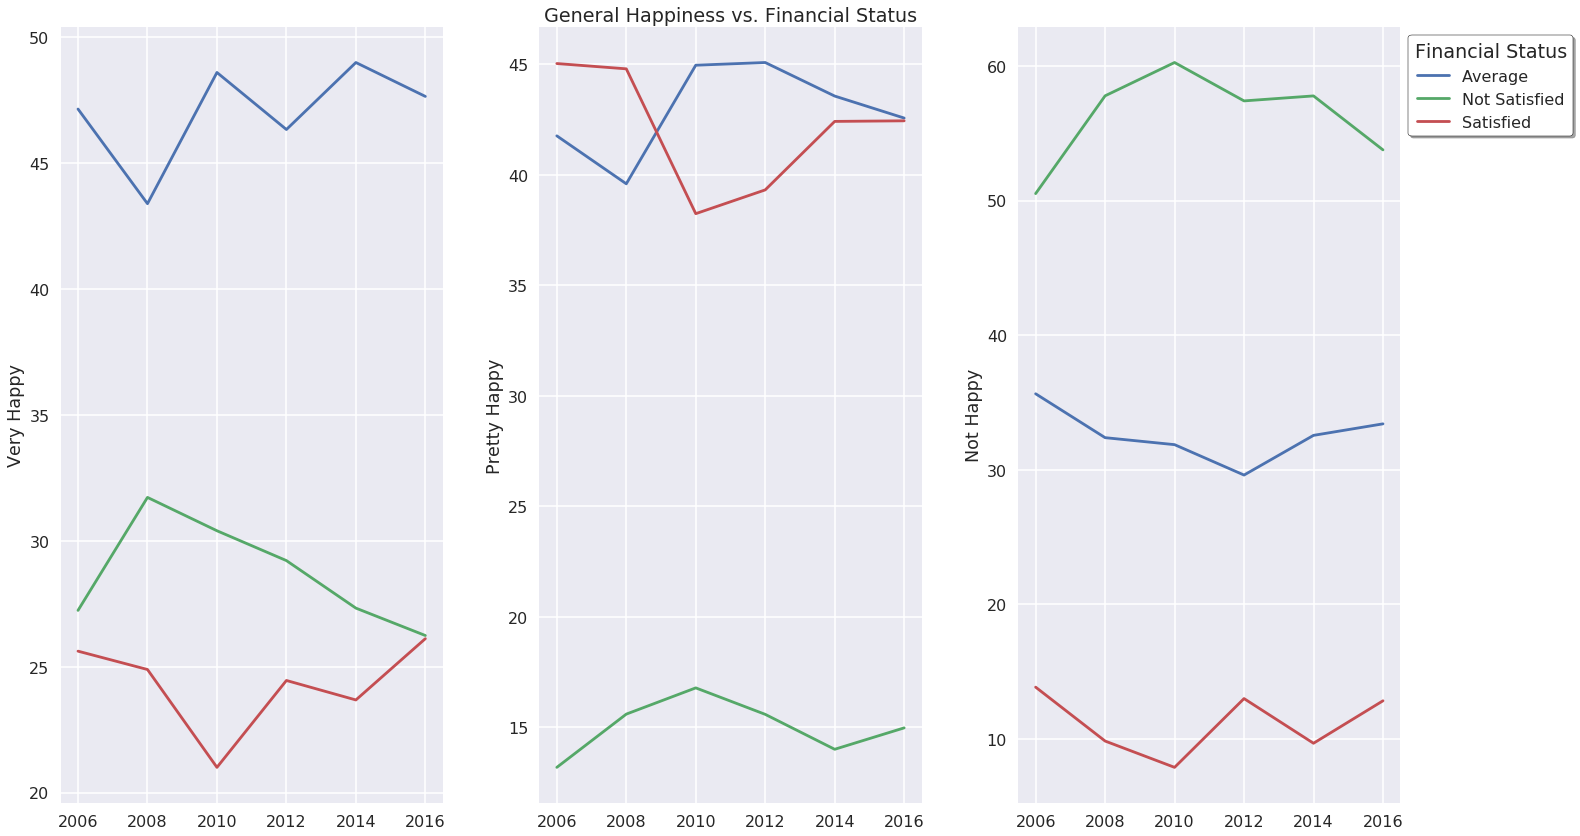

In [55]:

x_axis1=gss_happiness_grouped_prettyhappy.index.get_values()

#print(x_axis1)

y_axis_moreorless= (gss_happiness_finance_grouped_prettyhappy['More or less']/gss_happiness_finance_grouped_prettyhappy['total'])*100
y_axis_notatallsat= (gss_happiness_finance_grouped_prettyhappy['Not at all sat']/gss_happiness_finance_grouped_prettyhappy['total'])*100
y_axis_satisfied= (gss_happiness_finance_grouped_prettyhappy['Satisfied']/gss_happiness_finance_grouped_prettyhappy['total'])*100


y_axis_moreorless=y_axis_moreorless.tolist()
y_axis_notatallsat=y_axis_notatallsat.tolist()
y_axis_satisfied=y_axis_satisfied.tolist()


# moreorless_finance, = plt.plot(x_axis1, y_axis_moreorless, color='blue', label="More Or Less")
# notatallsat_finance, = plt.plot(x_axis1, y_axis_notatallsat, color='yellow', label="Not at all Satisfied")
# satisfied_finance, = plt.plot(x_axis1, y_axis_satisfied, color='green', label="Satisfied")

#plt.title('Pretty Happy vs financial status')

#plt.show()

# Plotting happiness = very happy and condition of health 

y_axis_moreorless1= (gss_happiness_finance_grouped_veryhappy['More or less']/gss_happiness_finance_grouped_veryhappy['total'])*100
y_axis_notatallsat1= (gss_happiness_finance_grouped_veryhappy['Not at all sat']/gss_happiness_finance_grouped_veryhappy['total'])*100
y_axis_satisfied1= (gss_happiness_finance_grouped_veryhappy['Satisfied']/gss_happiness_finance_grouped_veryhappy['total'])*100


y_axis_moreorless1=y_axis_moreorless1.tolist()
y_axis_notatallsat1=y_axis_notatallsat1.tolist()
y_axis_satisfied1=y_axis_satisfied1.tolist()


# moreorless_finance1, = plt.plot(x_axis1, y_axis_moreorless1, color='blue', label="More Or Less")
# notatallsat_finance1, = plt.plot(x_axis1, y_axis_notatallsat1, color='yellow', label="Not at all Satisfied")
# satisfied_finance1, = plt.plot(x_axis1, y_axis_satisfied1, color='green', label="Satisfied")

#plt.title('Very Happy vs financial status')

#plt.show()


# Plotting happiness = not happy and condition of health 

y_axis_moreorless2= (gss_happiness_finance_grouped_nothappy['More or less']/gss_happiness_finance_grouped_nothappy['total'])*100
y_axis_notatallsat2= (gss_happiness_finance_grouped_nothappy['Not at all sat']/gss_happiness_finance_grouped_nothappy['total'])*100
y_axis_satisfied2= (gss_happiness_finance_grouped_nothappy['Satisfied']/gss_happiness_finance_grouped_nothappy['total'])*100


y_axis_moreorless2=y_axis_moreorless2.tolist()
y_axis_notatallsat2=y_axis_notatallsat2.tolist()
y_axis_satisfied2=y_axis_satisfied2.tolist()


#figure size
plt.figure(figsize = (20,12))
#tight layout
# plt.tight_layout()

#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis1, y_axis_moreorless, label="Average")
plt.plot(x_axis1, y_axis_notatallsat, label="Not Satisfied")
plt.plot(x_axis1, y_axis_satisfied, label="Satisfied")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis1, y_axis_moreorless1, label="Average")
plt.plot(x_axis1, y_axis_notatallsat1, label="Not Satisfied")
plt.plot(x_axis1, y_axis_satisfied1, label="Satisfied")
plt.ylabel('Pretty Happy')
plt.title('General Happiness vs. Financial Status')


#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis1, y_axis_moreorless2, label="Average")
plt.plot(x_axis1, y_axis_notatallsat2, label="Not Satisfied")
plt.plot(x_axis1, y_axis_satisfied2, label="Satisfied")
plt.ylabel('Not Happy')

#legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Financial Status", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Finance.png")

#print charts

plt.show()




# General Happiness Vs Marital Status - Data Preperation 

In [56]:
#creating a new dataframe with selected columns
gss_happiness_maritial = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Marital status"]]

#rename the year value for ease of calling in code
gss_happiness_maritial_renamed = gss_happiness_maritial.rename(columns={"Gss year for this respondent                       ": 
                                                                    "Year", 
                                                                   })
#group the values based on variables
gss_happiness_maritial_grouped = gss_happiness_maritial_renamed.groupby(["Year", 
                                                                     "General happiness",
                                                                   "Marital status"],as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_maritial_grouped = gss_happiness_maritial_grouped[~gss_happiness_maritial_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

#drop the columns for condition of health, axis=1 implies that it is a column
gss_happiness_maritial_grouped = gss_happiness_maritial_grouped.drop("No answer", 1)

#dataframe for "Very happy vs Social"
gss_happiness_maritial_grouped_veryhappy = gss_happiness_maritial_grouped .loc[gss_happiness_maritial_grouped ['General happiness'] == 'Very happy']
gss_happiness_maritial_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_maritial_grouped_veryhappy['total'] = gss_happiness_maritial_grouped_veryhappy["Divorced"] + gss_happiness_maritial_grouped_veryhappy["Married"] + gss_happiness_maritial_grouped_veryhappy["Never married"] + gss_happiness_maritial_grouped_veryhappy["Separated"] + gss_happiness_maritial_grouped_veryhappy["Widowed"]
gss_happiness_maritial_grouped_veryhappy

#dataframe for "Pretty Happy vs Social"
gss_happiness_maritial_grouped_prettyhappy = gss_happiness_maritial_grouped.loc[gss_happiness_maritial_grouped['General happiness'] == 'Pretty happy']
gss_happiness_maritial_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_maritial_grouped_prettyhappy['total'] = gss_happiness_maritial_grouped_prettyhappy["Divorced"] + gss_happiness_maritial_grouped_prettyhappy["Married"] + gss_happiness_maritial_grouped_prettyhappy["Never married"] + gss_happiness_maritial_grouped_prettyhappy["Separated"] + gss_happiness_maritial_grouped_prettyhappy["Widowed"]
gss_happiness_maritial_grouped_prettyhappy

#dataframe for "Not too Happy vs Social"
gss_happiness_maritial_grouped_nothappy = gss_happiness_maritial_grouped .loc[gss_happiness_maritial_grouped ['General happiness'] == 'Not too happy']
gss_happiness_maritial_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_maritial_grouped_nothappy['total'] = gss_happiness_maritial_grouped_nothappy["Divorced"] + gss_happiness_maritial_grouped_nothappy["Married"] + gss_happiness_maritial_grouped_nothappy["Never married"] + gss_happiness_maritial_grouped_nothappy["Separated"] + gss_happiness_maritial_grouped_nothappy["Widowed"]
gss_happiness_maritial_grouped_nothappy

Marital status,General happiness,Divorced,Married,Never married,Separated,Widowed,total
Year,,,,,,,
2006,Not too happy,88,93,127,31,51,390
2008,Not too happy,55,81,123,18,37,314
2010,Not too happy,75,85,106,20,31,317
2012,Not too happy,60,64,100,24,29,277
2014,Not too happy,84,90,105,22,38,339
2016,Not too happy,114,86,157,29,66,452


# General Happiness Vs Marital Status 

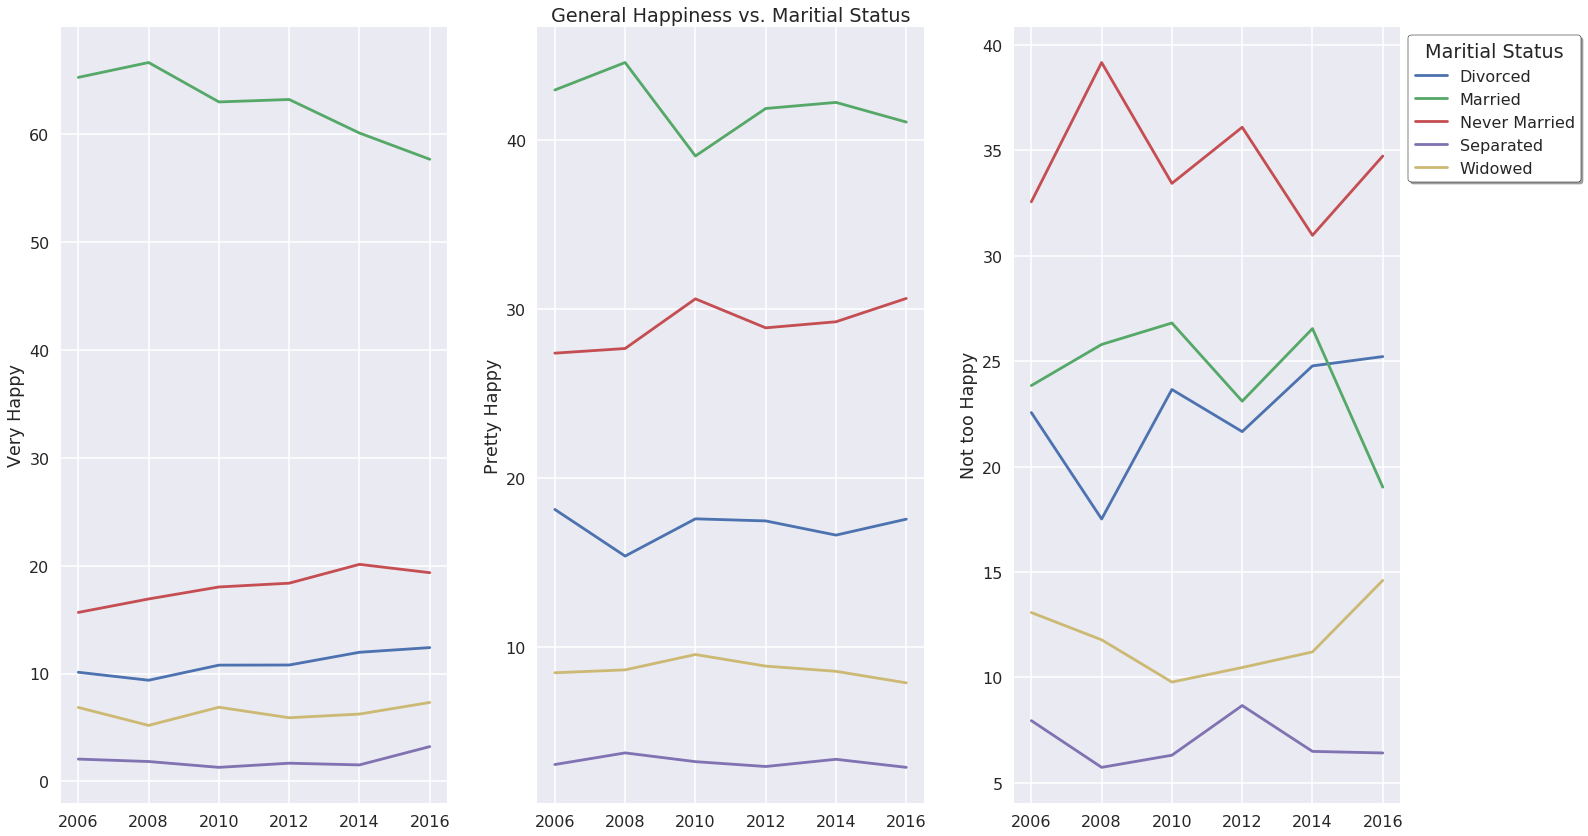

In [57]:
#very happy axis
x_axis_maritial1 = gss_happiness_maritial_grouped_veryhappy.index.get_values()
y_axis_maritial_divorce1 = (gss_happiness_maritial_grouped_veryhappy["Divorced"]/gss_happiness_maritial_grouped_veryhappy['total'])*100
y_axis_maritial_married1 = (gss_happiness_maritial_grouped_veryhappy["Married"]/gss_happiness_maritial_grouped_veryhappy['total'])*100
y_axis_maritial_never1 = (gss_happiness_maritial_grouped_veryhappy["Never married"]/gss_happiness_maritial_grouped_veryhappy['total'])*100
y_axis_maritial_sep1 = (gss_happiness_maritial_grouped_veryhappy["Separated"]/gss_happiness_maritial_grouped_veryhappy['total'])*100
y_axis_maritial_wid1 = (gss_happiness_maritial_grouped_veryhappy["Widowed"]/gss_happiness_maritial_grouped_veryhappy['total'])*100

#pretty happy axis
x_axis_maritial = gss_happiness_maritial_grouped_prettyhappy.index.get_values()
y_axis_maritial_divorce = (gss_happiness_maritial_grouped_prettyhappy["Divorced"]/gss_happiness_maritial_grouped_prettyhappy['total'])*100
y_axis_maritial_married = (gss_happiness_maritial_grouped_prettyhappy["Married"]/gss_happiness_maritial_grouped_prettyhappy['total'])*100
y_axis_maritial_never = (gss_happiness_maritial_grouped_prettyhappy["Never married"]/gss_happiness_maritial_grouped_prettyhappy['total'])*100
y_axis_maritial_sep = (gss_happiness_maritial_grouped_prettyhappy["Separated"]/gss_happiness_maritial_grouped_prettyhappy['total'])*100
y_axis_maritial_wid = (gss_happiness_maritial_grouped_prettyhappy["Widowed"]/gss_happiness_maritial_grouped_prettyhappy['total'])*100


#not too happy axis
x_axis_maritial2 = gss_happiness_maritial_grouped_nothappy.index.get_values()
y_axis_maritial_divorce2 = (gss_happiness_maritial_grouped_nothappy["Divorced"]/gss_happiness_maritial_grouped_nothappy['total'])*100
y_axis_maritial_married2 = (gss_happiness_maritial_grouped_nothappy["Married"]/gss_happiness_maritial_grouped_nothappy['total'])*100
y_axis_maritial_never2 = (gss_happiness_maritial_grouped_nothappy["Never married"]/gss_happiness_maritial_grouped_nothappy['total'])*100
y_axis_maritial_sep2 = (gss_happiness_maritial_grouped_nothappy["Separated"]/gss_happiness_maritial_grouped_nothappy['total'])*100
y_axis_maritial_wid2 = (gss_happiness_maritial_grouped_nothappy["Widowed"]/gss_happiness_maritial_grouped_nothappy['total'])*100


#figure size
plt.figure(figsize = (20,12))
#tight layout
# plt.tight_layout()


#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis_maritial1, y_axis_maritial_divorce1, label="Divorced")
plt.plot(x_axis_maritial1, y_axis_maritial_married1, label="Married")
plt.plot(x_axis_maritial1, y_axis_maritial_never1, label="Never Married")
plt.plot(x_axis_maritial1, y_axis_maritial_sep1, label="Separated")
plt.plot(x_axis_maritial1, y_axis_maritial_wid1, label="Separated")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis_maritial, y_axis_maritial_divorce, label="Divorced")
plt.plot(x_axis_maritial, y_axis_maritial_married, label="Married")
plt.plot(x_axis_maritial, y_axis_maritial_never, label="Never Married")
plt.plot(x_axis_maritial, y_axis_maritial_sep, label="Separated")
plt.plot(x_axis_maritial, y_axis_maritial_wid, label="Widowed")
plt.title('General Happiness vs. Maritial Status')
plt.ylabel('Pretty Happy')


#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis_maritial2, y_axis_maritial_divorce2, label="Divorced")
plt.plot(x_axis_maritial2, y_axis_maritial_married2, label="Married")
plt.plot(x_axis_maritial2, y_axis_maritial_never2, label="Never Married")
plt.plot(x_axis_maritial2, y_axis_maritial_sep2, label="Separated")
plt.plot(x_axis_maritial2, y_axis_maritial_wid2, label="Widowed")
plt.ylabel('Not too Happy')


#legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Maritial Status", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Maritial.png")

#print charts
plt.show()

# General Happiness Vs Labor Force Status - Data Preperation 

In [58]:
#creating a new dataframe with selected columns
gss_happiness_labor = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Labor force status"]]

#rename the year value for ease of calling in code
gss_happiness_labor_renamed = gss_happiness_labor.rename(columns={"Gss year for this respondent                       ": 
                                                                    "Year", 
                                                                   })
#group the values based on variables
gss_happiness_labor_grouped = gss_happiness_labor_renamed.groupby(["Year", 
                                                                     "General happiness",
                                                                   "Labor force status"],as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_labor_grouped = gss_happiness_labor_grouped[~gss_happiness_labor_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

#drop the columns for condition of health, axis=1 implies that it is a column
gss_happiness_labor_grouped = gss_happiness_labor_grouped.drop("No answer", 1)
gss_happiness_labor_grouped = gss_happiness_labor_grouped.drop("Keeping house", 1)
gss_happiness_labor_grouped = gss_happiness_labor_grouped.drop("Other", 1)


#dataframe for "Pretty Happy vs Social"
gss_happiness_labor_grouped_prettyhappy = gss_happiness_labor_grouped.loc[gss_happiness_labor_grouped['General happiness'] == 'Pretty happy']
gss_happiness_labor_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_labor_grouped_prettyhappy['total'] = gss_happiness_labor_grouped_prettyhappy["Retired"] + gss_happiness_labor_grouped_prettyhappy["School"] + gss_happiness_labor_grouped_prettyhappy["Temp not working"] + gss_happiness_labor_grouped_prettyhappy["Unempl, laid off"] + gss_happiness_labor_grouped_prettyhappy["Working fulltime"] + gss_happiness_labor_grouped_prettyhappy["Working parttime"]
gss_happiness_labor_grouped_prettyhappy
    
#dataframe for "Very happy vs Social"
gss_happiness_labor_grouped_veryhappy = gss_happiness_labor_grouped .loc[gss_happiness_labor_grouped ['General happiness'] == 'Very happy']
gss_happiness_labor_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_labor_grouped_veryhappy['total'] = gss_happiness_labor_grouped_veryhappy["Retired"] + gss_happiness_labor_grouped_veryhappy["School"] + gss_happiness_labor_grouped_veryhappy["Temp not working"] + gss_happiness_labor_grouped_veryhappy["Unempl, laid off"] + gss_happiness_labor_grouped_veryhappy["Working fulltime"] + gss_happiness_labor_grouped_veryhappy["Working parttime"]
gss_happiness_labor_grouped_veryhappy

#dataframe for "Not too Happy vs Social"
gss_happiness_labor_grouped_nothappy = gss_happiness_labor_grouped .loc[gss_happiness_labor_grouped ['General happiness'] == 'Not too happy']
gss_happiness_labor_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_labor_grouped_nothappy['total'] = gss_happiness_labor_grouped_nothappy["Retired"] + gss_happiness_labor_grouped_nothappy["School"] + gss_happiness_labor_grouped_nothappy["Temp not working"] + gss_happiness_labor_grouped_nothappy["Unempl, laid off"] + gss_happiness_labor_grouped_nothappy["Working fulltime"] + gss_happiness_labor_grouped_nothappy["Working parttime"]
gss_happiness_labor_grouped_nothappy



Labor force status,General happiness,Retired,School,Temp not working,"Unempl, laid off",Working fulltime,Working parttime,total
Year,,,,,,,,
2006,Not too happy,71,13,5,31,155,41,316
2008,Not too happy,48,5,5,23,133,38,252
2010,Not too happy,50,11,12,33,117,35,258
2012,Not too happy,65,13,7,30,79,31,225
2014,Not too happy,76,4,5,34,114,29,262
2016,Not too happy,101,16,10,50,126,57,360


# General Happiness Vs Labor Force Status - Visualization 

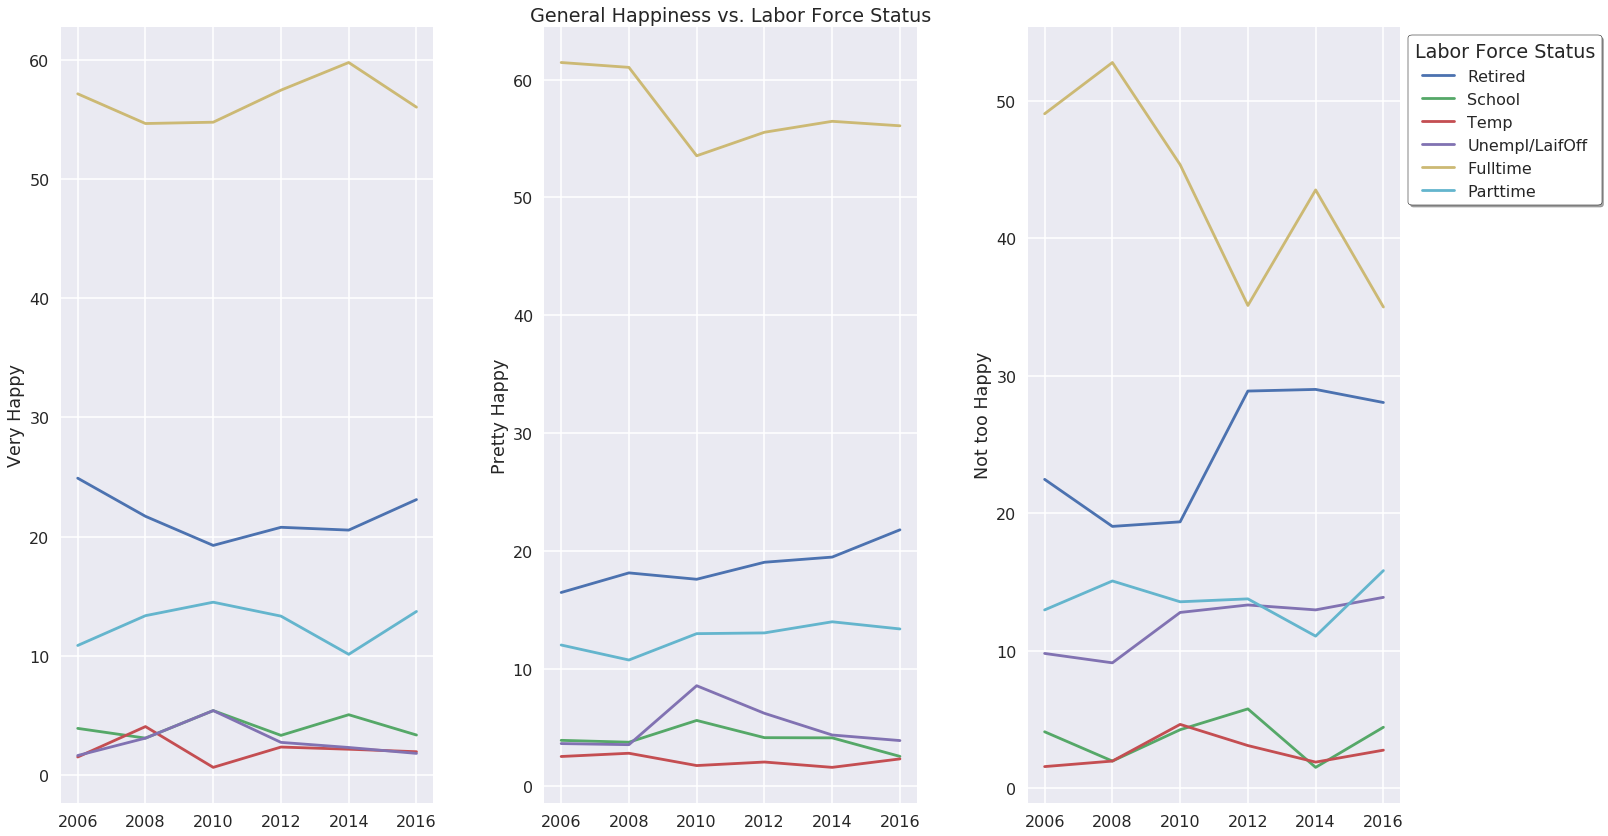

In [59]:
#very happy axis
x_axis_labor1 = gss_happiness_labor_grouped_veryhappy.index.get_values()
y_axis_labor_retired1 = (gss_happiness_labor_grouped_veryhappy["Retired"]/gss_happiness_labor_grouped_veryhappy['total'])*100
y_axis_labor_school1 = (gss_happiness_labor_grouped_veryhappy["School"]/gss_happiness_labor_grouped_veryhappy['total'])*100
y_axis_labor_temp1 = (gss_happiness_labor_grouped_veryhappy["Temp not working"]/gss_happiness_labor_grouped_veryhappy['total'])*100
y_axis_labor_unemp1 = (gss_happiness_labor_grouped_veryhappy["Unempl, laid off"]/gss_happiness_labor_grouped_veryhappy['total'])*100
y_axis_labor_ft1 = (gss_happiness_labor_grouped_veryhappy["Working fulltime"]/gss_happiness_labor_grouped_veryhappy['total'])*100
y_axis_labor_pt1 = (gss_happiness_labor_grouped_veryhappy["Working parttime"]/gss_happiness_labor_grouped_veryhappy['total'])*100


#pretty happy axis
x_axis_labor = gss_happiness_labor_grouped_prettyhappy.index.get_values()
y_axis_labor_retired = (gss_happiness_labor_grouped_prettyhappy["Retired"]/gss_happiness_labor_grouped_prettyhappy['total'])*100
y_axis_labor_school = (gss_happiness_labor_grouped_prettyhappy["School"]/gss_happiness_labor_grouped_prettyhappy['total'])*100
y_axis_labor_temp = (gss_happiness_labor_grouped_prettyhappy["Temp not working"]/gss_happiness_labor_grouped_prettyhappy['total'])*100
y_axis_labor_unemp = (gss_happiness_labor_grouped_prettyhappy["Unempl, laid off"]/gss_happiness_labor_grouped_prettyhappy['total'])*100
y_axis_labor_ft = (gss_happiness_labor_grouped_prettyhappy["Working fulltime"]/gss_happiness_labor_grouped_prettyhappy['total'])*100
y_axis_labor_pt = (gss_happiness_labor_grouped_prettyhappy["Working parttime"]/gss_happiness_labor_grouped_prettyhappy['total'])*100


#not too happy axis
x_axis_labor2 = gss_happiness_labor_grouped_nothappy.index.get_values()
y_axis_labor_retired2 = (gss_happiness_labor_grouped_nothappy["Retired"]/gss_happiness_labor_grouped_nothappy['total'])*100
y_axis_labor_school2 = (gss_happiness_labor_grouped_nothappy["School"]/gss_happiness_labor_grouped_nothappy['total'])*100
y_axis_labor_temp2 = (gss_happiness_labor_grouped_nothappy["Temp not working"]/gss_happiness_labor_grouped_nothappy['total'])*100
y_axis_labor_unemp2 = (gss_happiness_labor_grouped_nothappy["Unempl, laid off"]/gss_happiness_labor_grouped_nothappy['total'])*100
y_axis_labor_ft2 = (gss_happiness_labor_grouped_nothappy["Working fulltime"]/gss_happiness_labor_grouped_nothappy['total'])*100
y_axis_labor_pt2 = (gss_happiness_labor_grouped_nothappy["Working parttime"]/gss_happiness_labor_grouped_nothappy['total'])*100



#figure size
plt.figure(figsize = (20,12))
#tight layout
# plt.tight_layout()


#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis_labor1, y_axis_labor_retired1, label="Retired")
plt.plot(x_axis_labor1, y_axis_labor_school1, label="School")
plt.plot(x_axis_labor1, y_axis_labor_temp1, label="Temp")
plt.plot(x_axis_labor1, y_axis_labor_unemp1, label="Unempl/LaifOff")
plt.plot(x_axis_labor1, y_axis_labor_ft1, label="Fulltime")
plt.plot(x_axis_labor1, y_axis_labor_pt1, label="Parttime")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis_labor, y_axis_labor_retired, label="Retired")
plt.plot(x_axis_labor, y_axis_labor_school, label="School")
plt.plot(x_axis_labor, y_axis_labor_temp, label="Temp")
plt.plot(x_axis_labor, y_axis_labor_unemp, label="Unempl/LaifOff")
plt.plot(x_axis_labor, y_axis_labor_ft, label="Fulltime")
plt.plot(x_axis_labor, y_axis_labor_pt, label="Parttime")
plt.title('General Happiness vs. Labor Force Status')
plt.ylabel('Pretty Happy')


#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis_labor2, y_axis_labor_retired2, label="Retired")
plt.plot(x_axis_labor2, y_axis_labor_school2, label="School")
plt.plot(x_axis_labor2, y_axis_labor_temp2, label="Temp")
plt.plot(x_axis_labor2, y_axis_labor_unemp2, label="Unempl/LaifOff")
plt.plot(x_axis_labor2, y_axis_labor_ft2, label="Fulltime")
plt.plot(x_axis_labor2, y_axis_labor_pt2, label="Parttime")
plt.ylabel('Not too Happy')


#legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Labor Force Status", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_LaborStatus.png")

#print charts
plt.show()